In [1]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 1.1.2


In [12]:
from qiskit import QuantumCircuit

# Create a quantum circuit with one qbit
qc = QuantumCircuit(1)

qc.measure_all()

# Define initial_state as |1> = [0,1], and in plain English, it is a qubit resulting in the value 1 when observed.
initial_state = [0,1]

# Apply initialization operation on the qbit at position 0
qc.initialize(initial_state, 0)

In [18]:
# Prepare the simulation backend
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# Create an AerSimulator with statevector
backend = AerSimulator()
#backend = Aer.get_backend('statevector_simulator')

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000, memory=True, save_statevector=True)
result = job.result()


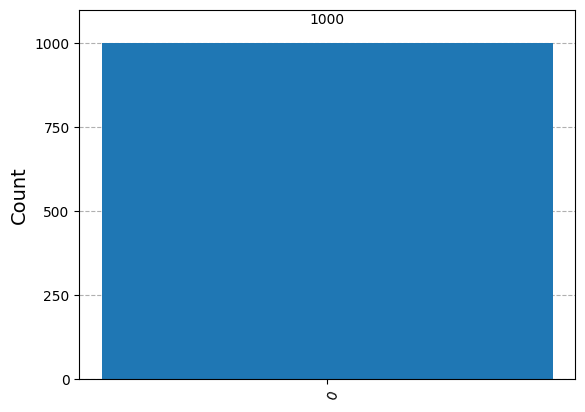

In [19]:
# The measured qbit
%matplotlib inline
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)
plt.show()

In [20]:
# First attempt to superpose two states

# Define state |psi>
initial_state = [1, 1]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qbit in the state 'initial_state'
qc.initialize(initial_state,0)

# Create an AerSimulator with statevector
backend = AerSimulator()

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000, memory=True, save_statevector=True)
result = job.result()

# Plot the results
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)
plt.show()

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [ ]:
# It didn’t quite work. It tells us: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [ ]:
# The amplitudes are the values in our array. They are proportional to proba-
# bilities. And all the probabilities should add up to exactly 1 (100%). We need
# to add weights to the quantum states |0⟩ and |1⟩. Let’s call them α and β .
# We weight |0⟩ with α and |1⟩ with β . Like this:
# |ψ⟩ =α|0⟩ +β |1⟩ = [1 ·α + 0 ·β]   [α] 
#                    [0 ·α + 1 ·β] = [β]
# Amplitudes are proportional to probabilities. We need to normalize them so
# that α2 +β 2 = 1. If both states |0⟩ and |1⟩ should have the same weight, then α = β .
# And therefore, we can solve our equation to α:
# α2 + α2 = 1 ⇔ 2 · α2 = 1 ⇔ α2 = 1/2 ⇔ α = 1/√2
# And we insert the value for both α andβ (both are equal). Let’s try this quan-
# tum state:
# |ψ⟩ = 1/√2|0⟩ + 1/√2|1⟩ = [1/√2]
#                           [1/√2]
# The corresponding array in Python is: [1/sqrt(2), 1/sqrt(2)]. Don’t forget to
# import sqrt.

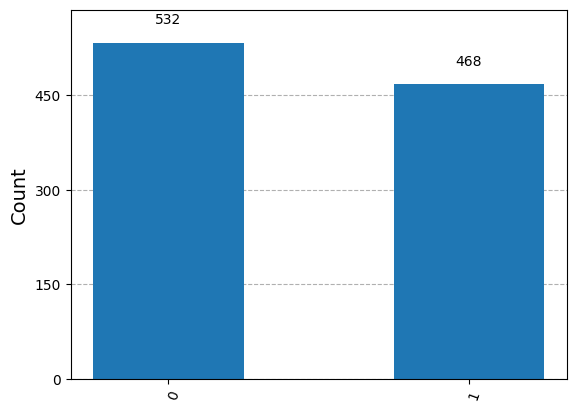

Counts:  {'1': 468, '0': 532}


In [23]:
# Weighted initial state

# Imports
from math import sqrt

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1,1) # 1 qubit, 1 classical bit

# Initialize the 0th qbit in the state 'initial_state'
qc.initialize(initial_state, 0)

# Add measurement
qc.measure(0,0)

# Create an AerSimulator
backend = AerSimulator()

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000)
result = job.result()

# Get the counts
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)
plt.show()

# Print the counts
print("Counts: ", counts)

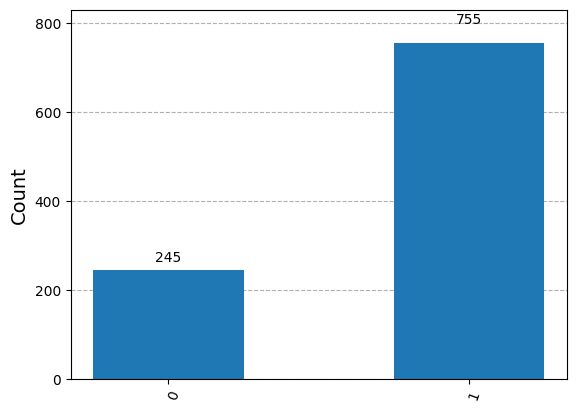

Counts:  {'0': 245, '1': 755}


In [25]:
# What is the state of a qbit that has 25% chance of resulting in 0 and 75% of resulting in 1?
# The vector for above is: [  1/2 ] 
#                          [ √3/2 ]
# in pyhon above vector is represented by the array [1/2, sqrt(3)/2]

# Define state |psi>
initial_state = [1/2, sqrt(3)/2]

# Redefine the quantum circuit
qc = QuantumCircuit(1,1) # 1 qubit,

# Initialize the 0th qbit in the state 'initial_state'
qc.initialize(initial_state, 0)

# Add measurement
qc.measure(0,0)

# Create an AerSimulator
backend = AerSimulator()

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000)
result = job.result()

# Get the counts
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)
plt.show()

# Print the counts
print("Counts: ", counts)

Counts:  {'1': 357, '0': 643}


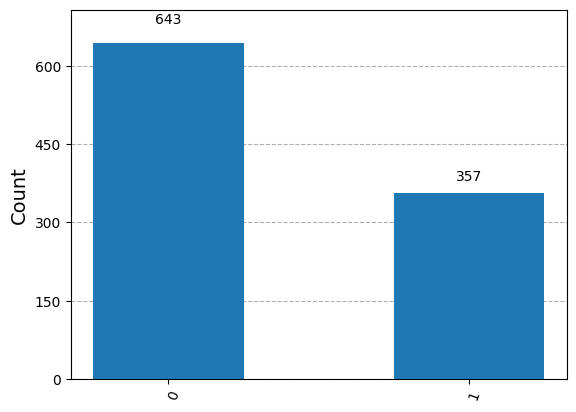

In [30]:
# Using theta to specify the quantum state vector

from math import cos, pi, sin

def get_state (theta):
    """returns a valid state vector"""
    return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get the feeling
theta = 5#-pi/2

# create, initilize, and execute the quantum circuit
qc = QuantumCircuit(1,1)
qc.initialize(get_state(theta), 0)
qc.measure(0,0)
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
job = backend.run(qc_transpiled, shots=1000)
result = job.result()
counts = result.get_counts()

# Print the counts
print("Counts: ", counts)

# Show the histogram
plot_histogram(counts)
plt.show()

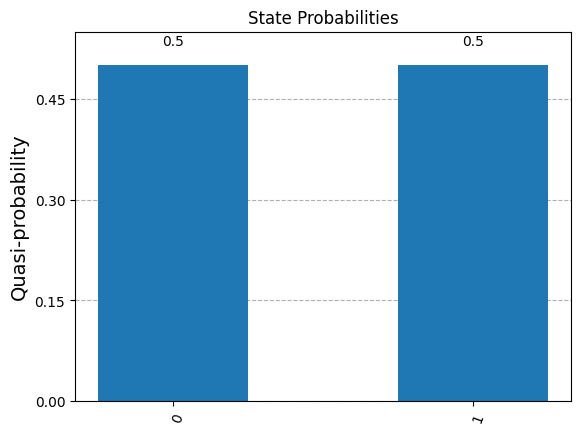

Statevector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Bloch vector components (x, y, z): (np.float64(0.9999999999999998), np.float64(0.0), np.float64(0.0))
Probabilities: [0.5 0.5]


In [49]:
# Exploring the Observer effect
# A circuit without measurement

from math import sqrt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

# Get the statevector using Statevector.from_instruction
statevector = Statevector.from_instruction(qc)

# Calculate Bloch vector components
x = 2 * statevector.data[0].real * statevector.data[1].real + 2 * statevector.data[0].imag * statevector.data[1].imag
y = 2 * statevector.data[0].real * statevector.data[1].imag - 2 * statevector.data[0].imag * statevector.data[1].real
z = abs(statevector.data[0])**2 - abs(statevector.data[1])**2

# Calculate probabilities and plot as a histogram
probabilities = statevector.probabilities()
plot_histogram({'0': probabilities[0], '1': probabilities[1]})
plt.title("State Probabilities")
plt.show()

# Print the statevector, Bloch vector components, and probabilities
print("Statevector:", statevector)
print("Bloch vector components (x, y, z):", (x, y, z))
print("Probabilities:", probabilities)

In [51]:
# Draw the circuit

qc.draw(output='text')

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

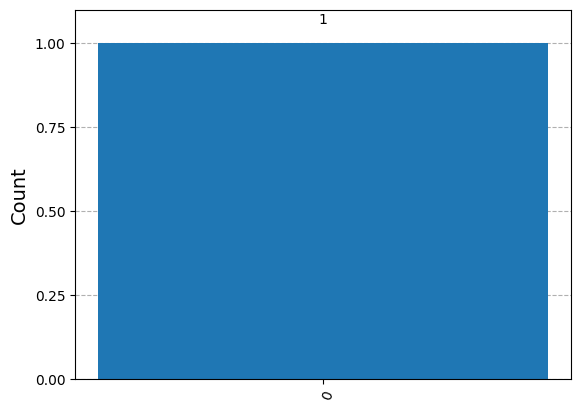

Counts:  {'0': 1}


In [55]:
# Circuit with measurement
qc = QuantumCircuit(1,1)
qc.initialize(initial_state,0)

# Observe the qBit
qc.measure(0,0)

# Create a simulator
backend = AerSimulator()

# Transpile the circuit for the backend
qc_transpiled = transpile(qc, backend)

# Run simulation
job = backend.run(qc_transpiled, shots=1)
result = job.result()

# Get counts
counts = result.get_counts()

# Plot histogram
plot_histogram(counts)
plt.show()

# Print counts
print("Counts: ", counts)

In [56]:
# Draw out the circuit with measurement
qc.draw(output='text')

┌─────────────────────────────┐┌─┐
  q: ┤ Initialize(0.70711,0.70711) ├┤M├
     └─────────────────────────────┘└╥┘
c: 1/════════════════════════════════╩═
                                     0

In [ ]:
# Our circuit now contains a measurement. That is an observation. It pulls our
# qubit out of a superposition state and lets it collapse into either 0 or 1.